In [1]:
import numpy as np
import NUTS as hmc
import hmc as hmc2
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)
#cov = np.asarray([[1, 1.98],[1.98, 4]])
inv_cov = np.linalg.inv(cov)
print(cov)


[[2.38928649 0.71895631]
 [0.71895631 0.91840063]]


In [3]:
def mock_posterior_and_gradient(q):
    grad = -q @ inv_cov
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * grad @ q.T
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, grad

In [4]:
def run_hmc(n_it, hmc, cov, burnin):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.NUTS(fid_params, .6, n_it, burnin)

    return sampler

In [5]:
def run_hmc2(n_it, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    return sampler

In [6]:
nit = 10000
burnin = 5000

start = time.time()
chain = run_hmc(nit, hmc, cov, burnin)
print("Total time to run is %.2f s" %(time.time()-start))
print("")

start = time.time()
#chain2 = run_hmc(nit, hmc, cov, burnin)
chain2 = run_hmc2(nit, 0.2, hmc2, 10, cov)
print("Total time to run is %.2f s" %(time.time()-start))

2.0
Reasonable epsilon is 2.0
Step 750 of 15000
Step 1500 of 15000
Step 2250 of 15000
Step 3000 of 15000
Step 3750 of 15000
Step 4500 of 15000
final epsilon is 1.5971626266198253
Step 5250 of 15000
Step 6000 of 15000
Step 6750 of 15000
Step 7500 of 15000
Step 8250 of 15000
Step 9000 of 15000
Step 9750 of 15000
Step 10500 of 15000
Step 11250 of 15000
Step 12000 of 15000
Step 12750 of 15000
Step 13500 of 15000
Step 14250 of 15000
Total time to run is 5.59 s

Accept 0 alpha=0.98  p=0.50  ΔH=0.018
Accept 500 alpha=0.97  p=0.40  ΔH=0.029
Accept 1000 alpha=0.98  p=0.11  ΔH=0.021
Accept 1500 alpha=0.99  p=0.06  ΔH=0.009
Reject 1860 alpha=0.97  p=0.98  Δh=0.034
Accept 2000 alpha=1.00  p=0.28  ΔH=0.004
Accept 2500 alpha=1.00  p=0.32  ΔH=-0.004
Accept 3000 alpha=1.01  p=0.48  ΔH=-0.009
Accept 3500 alpha=1.01  p=0.34  ΔH=-0.014
Accept 4000 alpha=1.00  p=0.19  ΔH=-0.003
Reject 4370 alpha=0.98  p=0.99  Δh=0.021
Accept 4500 alpha=1.03  p=0.17  ΔH=-0.032
Accept 5000 alpha=1.05  p=0.39  ΔH=-0.046
Acce

In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)

trace = np.array(chain.trace)
calls = np.array(chain.ncall_list)

#trace = np.array(np.vstack({tuple(row) for row in chain.trace}))
#trace, idx = np.unique(np.array(chain.trace),True, axis=0)
#print(idx)
#calls = np.array(np.array(chain.ncall_list)[idx])

print(trace)

print(trace.shape)
print(np.unique(trace[:,0]).shape)
print(calls.shape)

trace2 = np.array(chain2.trace)
calls2 = np.array(chain2.ncall_list)
print(trace2.shape)
print(np.unique(trace2[:,0]).shape)
print(calls2.shape)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 ...
 [ 0.7638191  -1.91846545]
 [ 0.7638191  -1.91846545]
 [ 0.7638191  -1.91846545]]
(15000, 2)
(4341,)
(15000,)
(10000, 2)
(9949,)
(10000,)


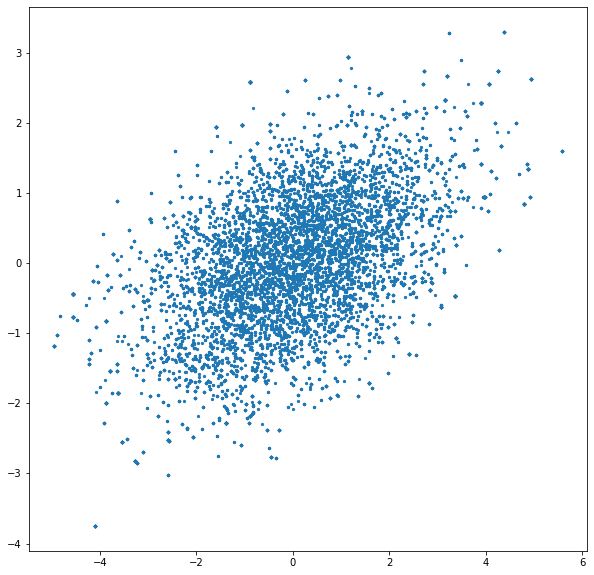

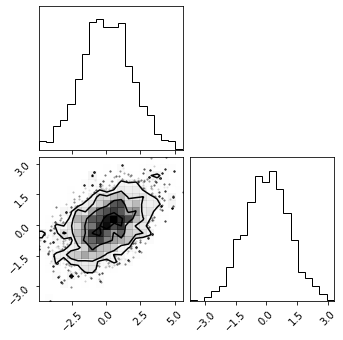

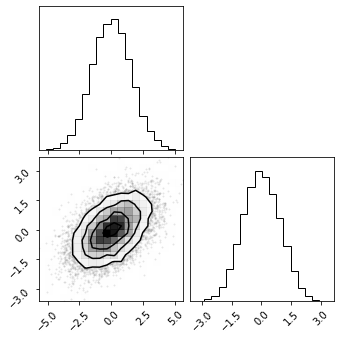

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.scatter(trace2[:,0],trace2[:,1],s=5)
plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [9]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    #plt.ylim(botlim,toplim)
    
    #print(np.std(trace[:,dim]))
    

[[1.5457317  0.84791291]
 [0.84791291 0.95833221]]


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=ax

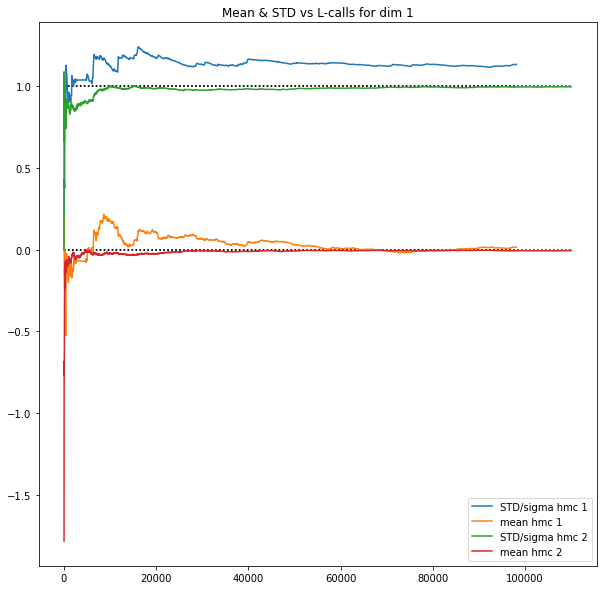

In [10]:
print(np.sqrt(cov))

plot_conv(trace,1,-1,1.5,1, cov, calls)
plot_conv(trace2,1,-1,1.5,2, cov, calls2)
plt.show()